# İş Problemi

FLO müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istiyor. Buna yönelik olarak müşterilerin davranışları tanımlanacak ve bu davranışlardaki öbeklenmelere göre gruplar oluşturulacak.

# Veri Seti Hikayesi

Veri seti Flo’dan son alışverişlerini 2020 - 2021 yıllarında OmniChannel (hem online hem offline alışveriş yapan) olarak yapan müşterilerin geçmiş alışveriş davranışlarından elde edilen bilgilerden oluşmaktadır.

In [499]:
# master_id: Eşsiz müşteri numarası
# order_channel : Alışveriş yapılan platforma ait hangi kanalın kullanıldığı (Android, ios, Desktop, Mobile, Offline)
# last_order_channel : En son alışverişin yapıldığı kanal
# first_order_date : Müşterinin yaptığı ilk alışveriş tarihi
# last_order_date : Müşterinin yaptığı son alışveriş tarihi
# last_order_date_online : Muşterinin online platformda yaptığı son alışveriş tarihi
# last_order_date_offline : Muşterinin offline platformda yaptığı son alışveriş tarihi
# order_num_total_ever_online : Müşterinin online platformda yaptığı toplam alışveriş sayısı
# order_num_total_ever_offline : Müşterinin offline'da yaptığı toplam alışveriş sayısı
# customer_value_total_ever_offline : Müşterinin offline alışverişlerinde ödediği toplam ücret
# customer_value_total_ever_online : Müşterinin online alışverişlerinde ödediği toplam ücret
# interested_in_categories_12 : Müşterinin son 12 ayda alışveriş yaptığı kategorilerin listesi
# store_type : 3 farklı companyi ifade eder. A company'sinden alışveriş yapan kişi B'dende yaptı ise A,B şeklinde yazılmıştır.

# Görev 1: Veriyi Hazırlama

### Adım1:
flo_data_20K.csv verisini okutunuz.

### Adım2:
Müşterileri segmentlerken kullanacağınız değişkenleri seçiniz.

Not: Tenure (Müşterinin yaşı), Recency (en son kaç gün önce alışveriş yaptığı) gibi yeni değişkenler oluşturabilirsiniz.

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

In [501]:
pd.set_option('display.max_columns', None)

In [502]:
df_ = pd.read_csv('/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/06 - Machine Learning/06_unsupervised_learning/case_study_III_unsupervised_learning/00_dataset/flo_data_20k.csv')
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [504]:
date_columns = [col for col in df.columns if 'date' in col]

In [505]:
df[date_columns] = df[date_columns].apply(pd.to_datetime)

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [507]:
analysis_date = df['last_order_date'].max() + pd.DateOffset(days=2)

In [508]:
df['recency'] = (analysis_date - df["last_order_date"]).dt.days
df['tenure'] = (df["last_order_date"] - df["first_order_date"]).dt.days

In [509]:
df['order_channel']

0        Android App
1        Android App
2        Android App
3        Android App
4            Desktop
            ...     
19940    Android App
19941        Desktop
19942        Ios App
19943    Android App
19944    Android App
Name: order_channel, Length: 19945, dtype: object

In [510]:
model_df = df[['order_num_total_ever_online','order_num_total_ever_offline','customer_value_total_ever_offline','customer_value_total_ever_online','recency','tenure']]

# Görev 2: K-Means ile Müşteri Segmentasyonu

### Adım 1:
Değişkenleri standartlaştırınız.

### Adım 2:
Optimum küme sayısını belirleyiniz.

### Adım 3:
Modelinizi oluşturunuz ve müşterilerinizi segmentleyiniz.

### Adım 4:
Herbir segmenti istatistiksel olarak inceleyeniz.

In [511]:
def check_skew(df_skew, column):
    skew = stats.skew(df_skew[column])
    skewtest = stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column],color = "g")
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return

/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

order_num_total_ever_online's: Skew: 10.487693811914617, : SkewtestResult(statistic=152.9996121784795, pvalue=0.0)
order_num_total_ever_offline's: Skew: 20.328068075845888, : SkewtestResult(statistic=184.13121810134328, pvalue=0.0)
customer_value_total_ever_offline's: Skew: 16.29952194789334, : SkewtestResult(statistic=173.73456097827923, pvalue=0.0)


/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

customer_value_total_ever_online's: Skew: 20.08427979804232, : SkewtestResult(statistic=183.56317267711924, pvalue=0.0)
recency's: Skew: 0.6172488156761073, : SkewtestResult(statistic=32.86977170491703, pvalue=5.944419293752164e-237)
tenure's: Skew: 1.756242119042335, : SkewtestResult(statistic=71.08790370222574, pvalue=0.0)


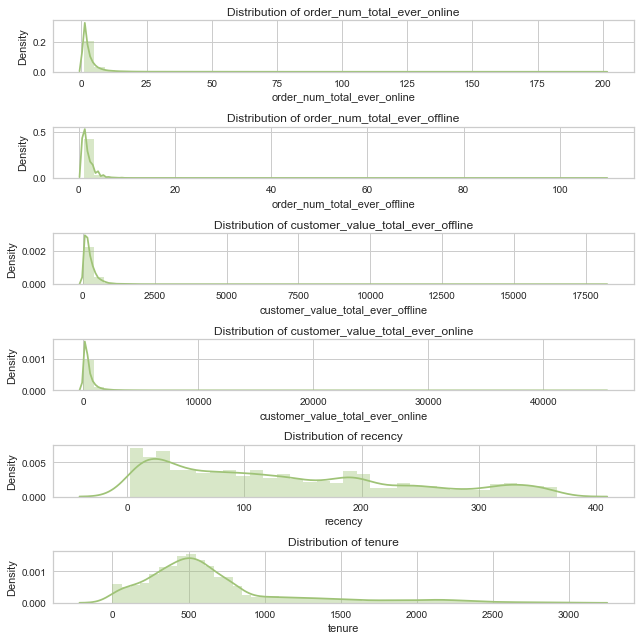

In [512]:
plt.figure(figsize=(9, 9))
plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')
plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')
plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')
plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')
plt.subplot(6, 1, 5)
check_skew(model_df,'recency')
plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()

In [513]:
model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
model_df['customer_value_total_ever_offline']=np.log1p(model_df['customer_value_total_ever_offline'])
model_df['customer_value_total_ever_online']=np.log1p(model_df['customer_value_total_ever_online'])
model_df['recency']=np.log1p(model_df['recency'])
model_df['tenure']=np.log1p(model_df['tenure'])
model_df.head()

/var/folders/r8/5249pssn4211ttm2__jhd09h0000gn/T/ipykernel_28540/1844814189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_online']=np.log1p(model_df['order_num_total_ever_online'])
/var/folders/r8/5249pssn4211ttm2__jhd09h0000gn/T/ipykernel_28540/1844814189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['order_num_total_ever_offline']=np.log1p(model_df['order_num_total_ever_offline'])
/var/folders/r8/5249pssn4211ttm2__jhd09h0000gn/T/ipykernel_28540/184481418

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,1.609438,0.693147,4.948689,6.685087,4.564348,4.787492
1,2.995732,1.098612,5.081218,7.525414,4.663439,7.293018
2,1.386294,1.098612,5.252116,5.982298,5.231109,5.905362
3,0.693147,0.693147,3.713328,4.418600,4.912655,2.484907
4,0.693147,0.693147,3.931630,5.081342,4.465908,6.368187


In [514]:
sscaler = StandardScaler()
model_scale = sscaler.fit_transform(model_df)

In [515]:
model_df=pd.DataFrame(model_scale,columns=model_df.columns)
model_df.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,recency,tenure
0,0.713231,-0.763117,-0.271540,1.009833,0.080988,-1.456300
1,3.086240,0.315860,-0.115748,1.873087,0.172071,1.164115
2,0.331262,0.315860,0.085149,0.287871,0.693865,-0.287171
3,-0.855243,-0.763117,-1.723750,-1.318489,0.401147,-3.864468
4,-0.855243,-0.763117,-1.467129,-0.637665,-0.009496,0.196877


/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

order_num_total_ever_online's: Skew: 1.2719216864725729, : SkewtestResult(statistic=57.765036274020986, pvalue=0.0)
order_num_total_ever_offline's: Skew: 1.5176631749431355, : SkewtestResult(statistic=64.93702266255622, pvalue=0.0)
customer_value_total_ever_offline's: Skew: -0.04684593391897674, : SkewtestResult(statistic=-2.700465998896719, pvalue=0.006924241425604271)


/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mericgenc/opt/anaconda3/envs/genc_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

customer_value_total_ever_online's: Skew: 0.23427393589370873, : SkewtestResult(statistic=13.333617236202459, pvalue=1.4756548125466951e-40)
recency's: Skew: -0.8417401289919987, : SkewtestResult(statistic=-42.533303361607274, pvalue=0.0)
tenure's: Skew: -1.832294072314152, : SkewtestResult(statistic=-72.90574966805994, pvalue=0.0)


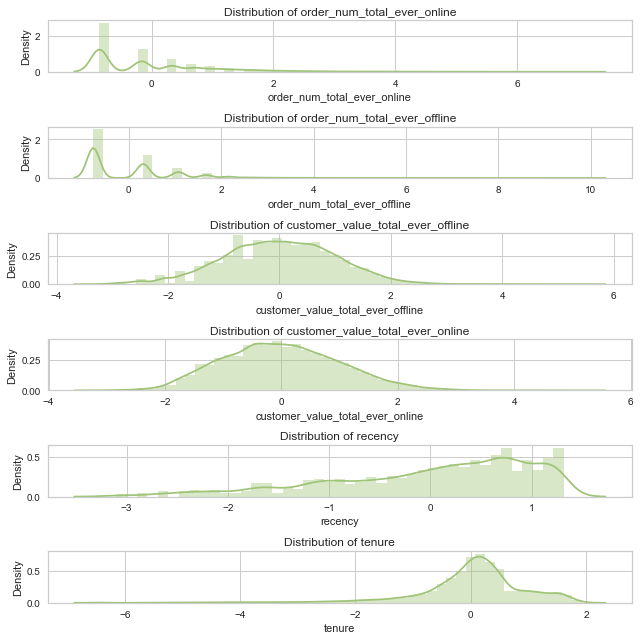

In [516]:
plt.figure(figsize=(9, 9))
plt.subplot(6, 1, 1)
check_skew(model_df,'order_num_total_ever_online')
plt.subplot(6, 1, 2)
check_skew(model_df,'order_num_total_ever_offline')
plt.subplot(6, 1, 3)
check_skew(model_df,'customer_value_total_ever_offline')
plt.subplot(6, 1, 4)
check_skew(model_df,'customer_value_total_ever_online')
plt.subplot(6, 1, 5)
check_skew(model_df,'recency')
plt.subplot(6, 1, 6)
check_skew(model_df,'tenure')
plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)
plt.show()

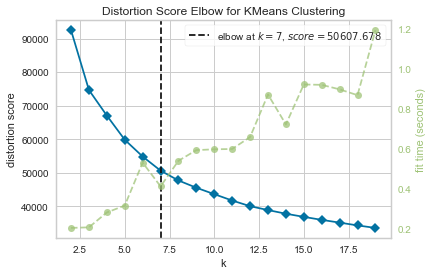

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [517]:
kmeans = KMeans()
elbow = KElbowVisualizer(kmeans, k=(2, 20))
elbow.fit(model_df)
elbow.show()

In [518]:
kmeans = KMeans(n_clusters=elbow.elbow_value_).fit(model_df)

In [519]:
kmeans.n_clusters

7

In [520]:
kmeans.cluster_centers_

array([[-0.25501314, -0.32315279, -0.16354638, -0.07294194, -1.53156235,
         0.09903285],
       [-0.6459744 ,  0.64356108,  0.68595599, -0.68290259,  0.41422717,
         0.10002499],
       [-0.68315894, -0.68377837, -0.72990121, -0.74348228,  0.55895103,
        -0.15599533],
       [ 0.2929962 ,  1.88130487,  1.41422932,  0.39043877, -0.25514882,
         0.40049207],
       [ 0.56257163, -0.49545664, -0.45769301,  0.65258833,  0.4773946 ,
         0.19420408],
       [-0.61131029, -0.64129649, -0.21447559, -0.47848921,  0.1614464 ,
        -2.85388135],
       [ 2.03524676, -0.06466931, -0.08768337,  1.65024166, -0.51525256,
         0.77460975]])

In [521]:
kmeans.labels_

array([4, 6, 4, ..., 0, 3, 2], dtype=int32)

In [522]:
clusters = kmeans.labels_

In [523]:
df['clusters'] = clusters + 1
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,clusters
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],95,119,5
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,7
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",186,366,5
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,6
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],86,582,3


In [524]:
df.groupby('clusters').agg({
    'order_num_total_ever_online': ['mean','min','max'],
    'order_num_total_ever_offline': ['mean','min','max'],
    'customer_value_total_ever_offline': ['mean','min','max'],
    'customer_value_total_ever_online': ['mean','min','max'],
    'recency': ['mean','min','max'],
    'tenure': ['mean','min','max']
})

order_num_total_ever_online             order_num_total_ever_offline  \
                                mean  min    max                         mean   
clusters                                                                        
1                           2.033874  1.0    7.0                     1.429076   
2                           1.316862  1.0    5.0                     2.491085   
3                           1.253159  1.0    4.0                     1.073701   
4                           3.405894  1.0   41.0                     4.946293   
5                           3.802693  1.0   12.0                     1.250618   
6                           1.413043  1.0    9.0                     1.115942   
7                          11.236434  3.0  200.0                     1.726744   

                     customer_value_total_ever_offline                    \
          min    max                              mean     min       max   
clusters                                                                   
1         1.0    4.0                        191.049100   12.99   1299.96   
2         1.0    7.0                        354.127924   70.96   1719.96   
3         1.0    3.0                        112.284574   10.49    384.94   
4         2.0  109.0                        698.232452  107.11  18119.14   
5         1.0    3.0                        146.837285   10.00    909.95   
6         1.0    4.0                        186.903596   12.99   1268.86   
7         1.0    9.0                        214.670068   12.99   1263.76   

         customer_value_total_ever_online                       recency      \
                                     mean     min       max        mean min   
clusters                                                                      
1                              348.650501   23.99   2729.67   19.563867   2   
2                              185.648788   12.99    913.01  166.802598  11   
3                              170.206820   14.00    707.82  186.966308  18   
4                              563.129183   27.95   5224.87  100.657795   2   
5                              627.516318  120.24   7665.28  173.063204  21   
6                              250.483216   19.99   2815.91  146.952899   4   
7                             1807.071391  328.89  45220.13   81.671512   2   

                    tenure            
          max         mean min   max  
clusters                              
1          71   619.648200  58  2928  
2         367   638.437341  61  2911  
3         367   509.866168  75  2828  
4         366   818.038498  20  2987  
5         367   719.718054  52  2964  
6         367    47.863225   0   147  
7         365  1194.481105  43  3034

# Görev 3: Hierarchical Clustering ile Müşteri Segmentasyonu

### Adım 1:
Görev 2'de standırlaştırdığınız dataframe'i kullanarak optimum küme sayısını belirleyiniz.

### Adım 2:
Modelinizi oluşturunuz ve müşterileriniz segmentleyiniz.

### Adım 3:
Her bir segmenti istatistiksel olarak inceleyeniz.

In [525]:
hc_complete = linkage(model_df, 'complete')

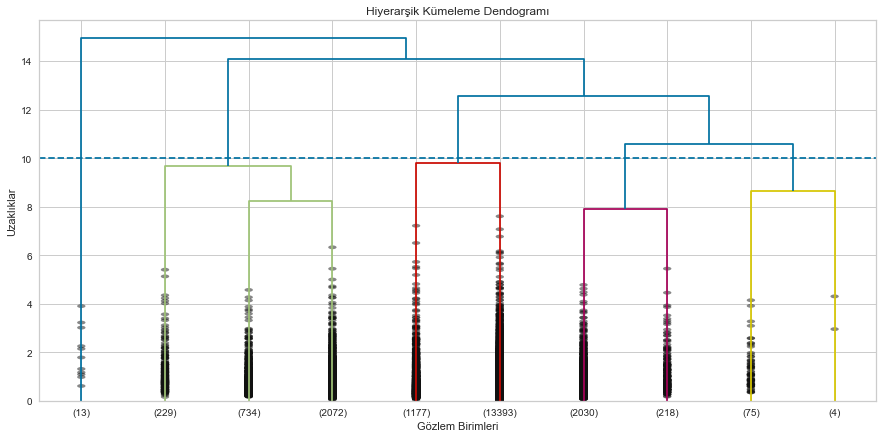

In [526]:
plt.figure(figsize=(15, 7))
plt.title("Hiyerarşik Kümeleme Dendogramı")
plt.xlabel("Gözlem Birimleri")
plt.ylabel("Uzaklıklar")
dendrogram(hc_complete,
           truncate_mode="lastp",
           p=10,
           show_contracted=True,
           leaf_font_size=10)
plt.axhline(y=10, color='b', linestyle='--')
plt.show()

In [527]:
hc = AgglomerativeClustering(n_clusters=5)

In [528]:
hierarchical_clusters = hc.fit_predict(model_df)

In [529]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,clusters
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],95,119,5
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,7
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",186,366,5
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,6
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],86,582,3


In [530]:
df['hierarchical_clusters'] = hierarchical_clusters + 1

In [531]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,recency,tenure,clusters,hierarchical_clusters
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],95,119,5,2
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",105,1469,7,1
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",186,366,5,1
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",135,11,6,4
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],86,582,3,5


In [532]:
df.groupby('hierarchical_clusters').agg({
    'order_num_total_ever_online': ['mean','min','max'],
    'order_num_total_ever_offline': ['mean','min','max'],
    'customer_value_total_ever_offline': ['mean','min','max'],
    'customer_value_total_ever_online': ['mean','min','max'],
    'recency': ['mean','min','max'],
    'tenure': ['mean','min','max']
})

order_num_total_ever_online              \
                                             mean  min    max   
hierarchical_clusters                                           
1                                        6.600280  1.0  200.0   
2                                        3.206782  1.0   20.0   
3                                        1.333400  1.0   13.0   
4                                        1.390131  1.0    8.0   
5                                        1.186990  1.0    4.0   

                      order_num_total_ever_offline              \
                                              mean  min    max   
hierarchical_clusters                                            
1                                         2.411518  1.0   16.0   
2                                         1.013328  1.0    3.0   
3                                         3.149780  1.0  109.0   
4                                         1.037008  1.0    3.0   
5                                         1.089271  1.0    3.0   

                      customer_value_total_ever_offline                   \
                                                   mean    min       max   
hierarchical_clusters                                                      
1                                            320.951920  12.99  18119.14   
2                                            122.593228  10.00    909.95   
3                                            425.132311  24.98  10239.46   
4                                            149.438142  12.99   1074.89   
5                                            145.593627  10.49   1359.47   

                      customer_value_total_ever_online                    \
                                                  mean     min       max   
hierarchical_clusters                                                      
1                                          1059.234017  101.98  45220.13   
2                                           542.217738   19.99   7665.28   
3                                           198.245443   14.99   3658.32   
4                                           237.817471   14.00   2626.48   
5                                           156.848744   12.99    707.82   

                          recency               tenure            
                             mean min  max        mean min   max  
hierarchical_clusters                                             
1                      113.598680   2  367  943.481104  20  3034  
2                      113.827911   2  367  633.460800  22  3031  
3                      134.928915   2  367  646.025831  13  2911  
4                      144.652274   2  367   79.084040   0   383  
5                      189.092087  22  367  569.169811  57  2829

In [533]:
df['clusters'].value_counts()

3    4274
2    3926
5    3639
1    2834
4    2104
7    2064
6    1104
Name: clusters, dtype: int64

In [534]:
df['hierarchical_clusters'].value_counts()

2    5102
1    5001
3    4994
5    3551
4    1297
Name: hierarchical_clusters, dtype: int64